## Avaliando datasets modificados pelo bert_tokenizer (com e sem OOV)
## Configurações

- bert base neuralmind
- os nomes não legíveis são métodos que usam BERT, fiz uma variação (usando ranking de padrões, fazendo média deles, etc)
- o BERT usa os 4 melhores padrões variando de 1 até 4. Ex: seja os padrões [p1, p2, p3, p4], primeiro usa [p1], depois [p1, p2], [p1,p2,p3] e por fim [p1,p2, p3,p4].
- todos os tokens do dataset têm tamanho 1
- tamanho corpus (para comparação): 240M
- 240M N=574 True=276

### com OOV
- N=1045 True=518 oov=471

### sem OOV
- N=574 True=276


<Figure size 432x288 with 0 Axes>

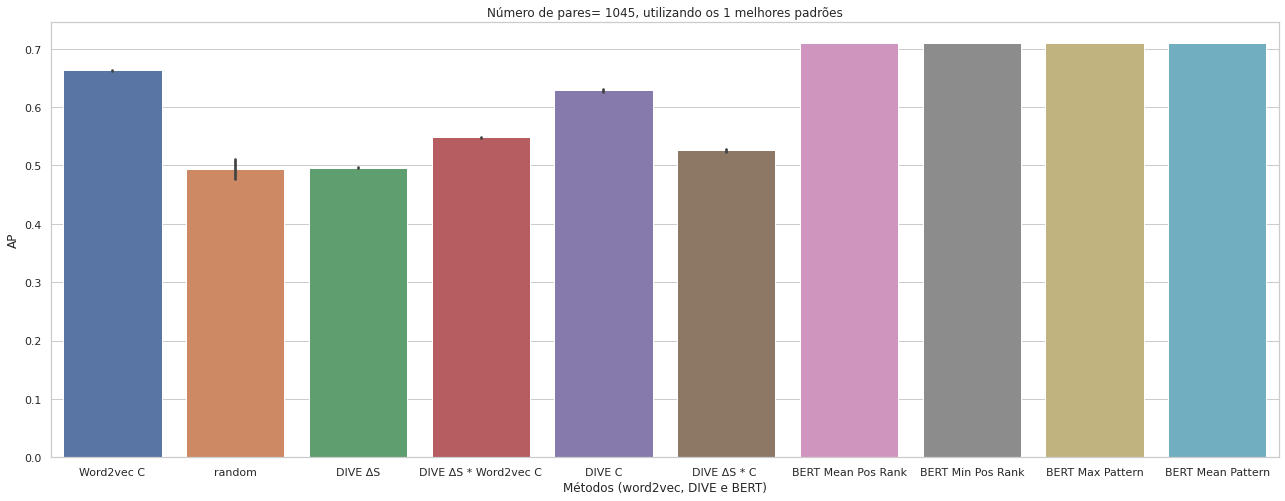

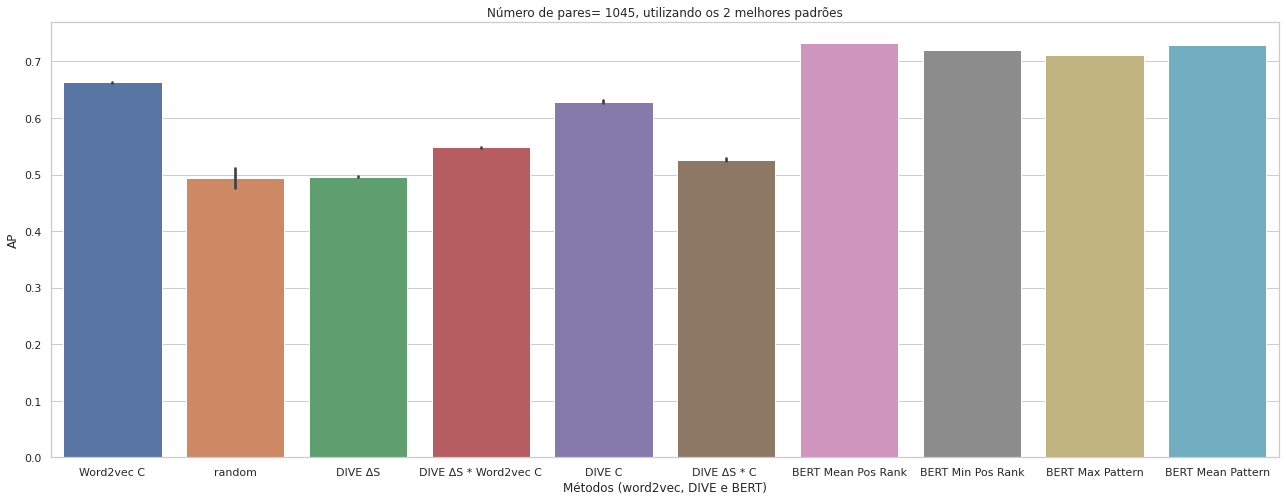

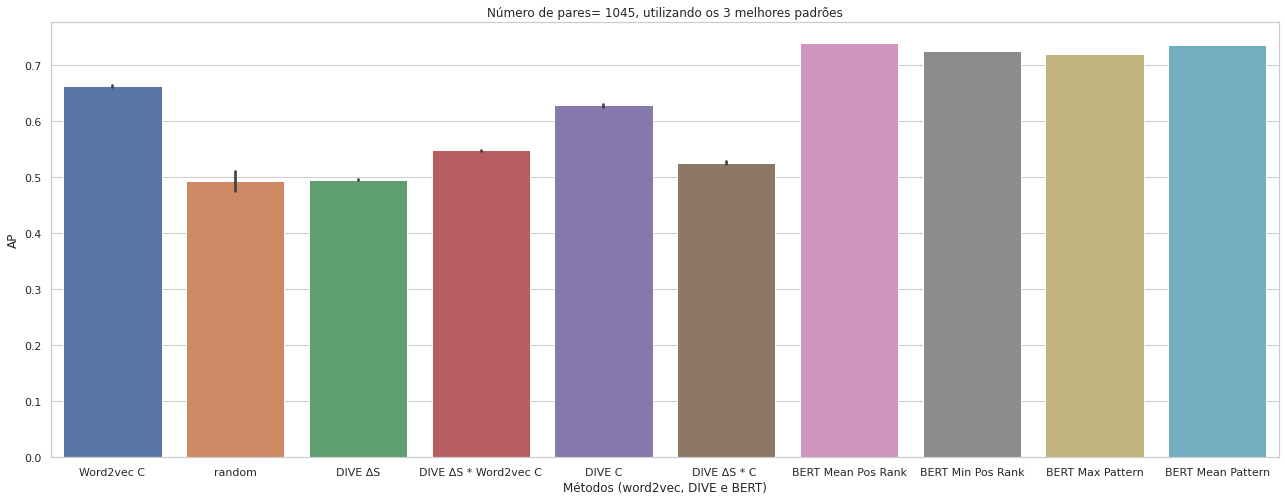

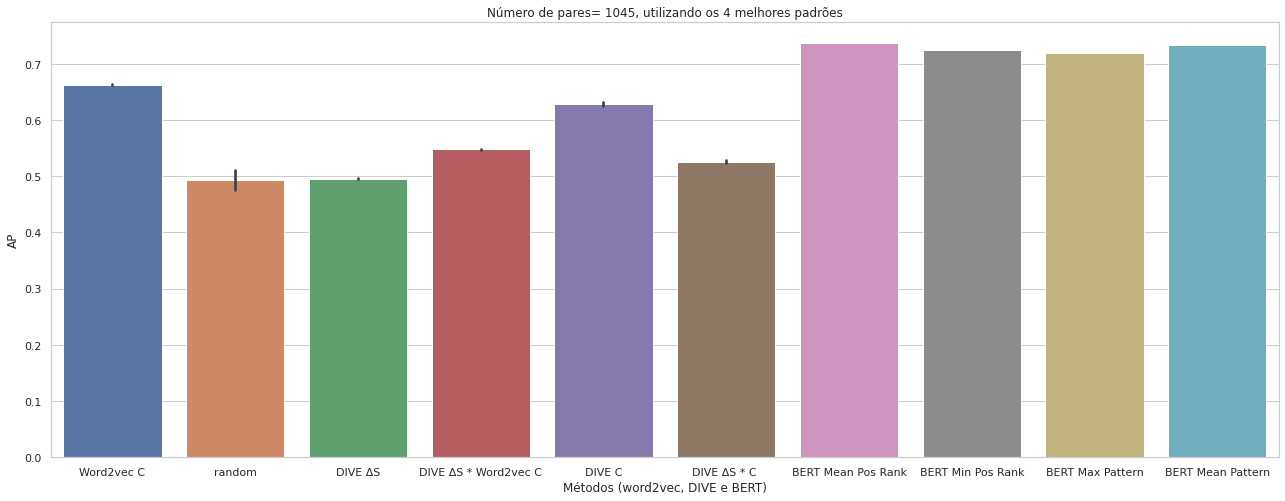

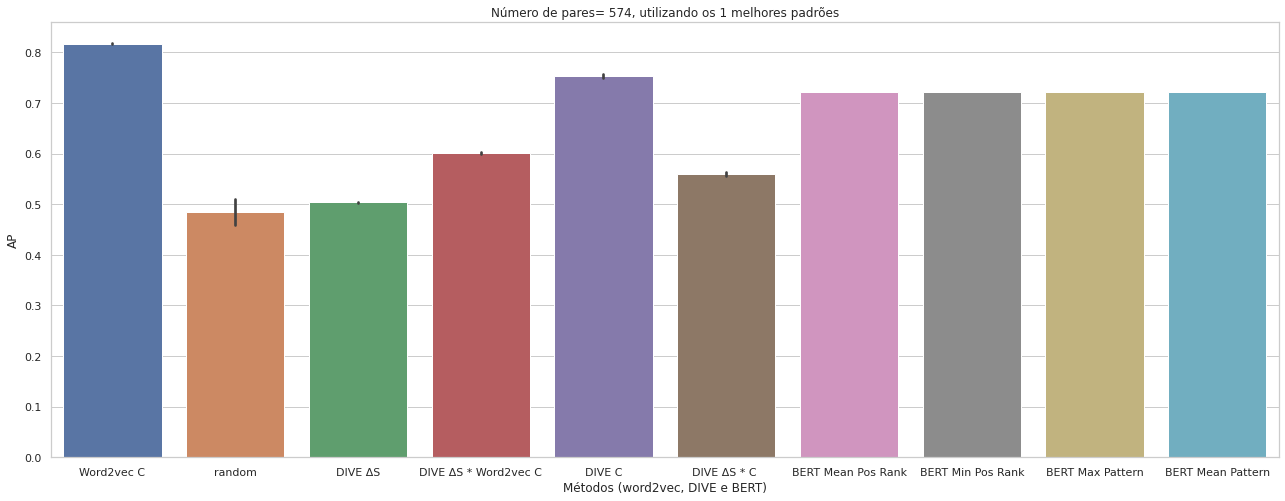

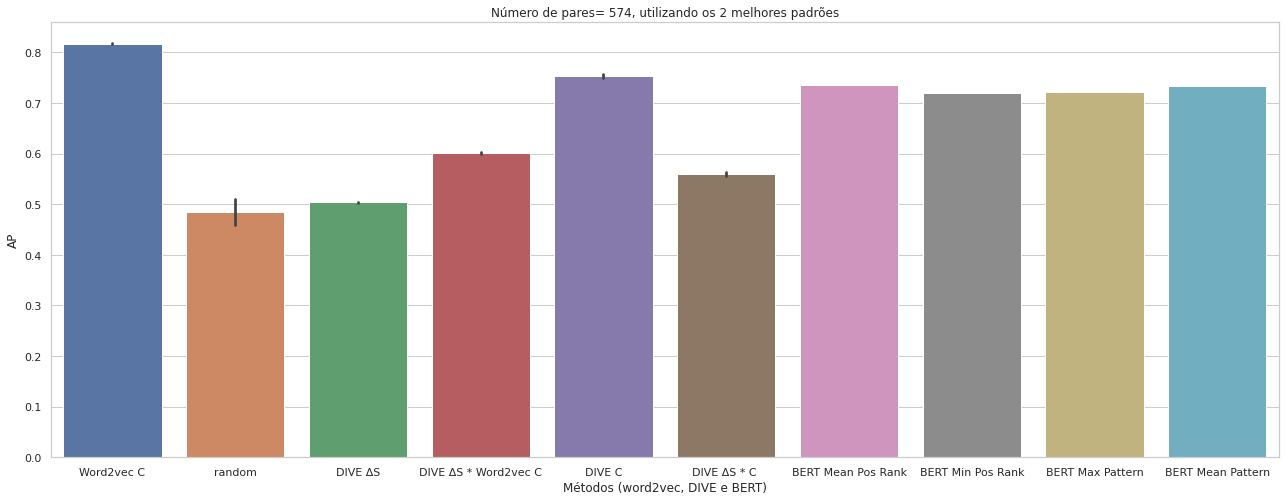

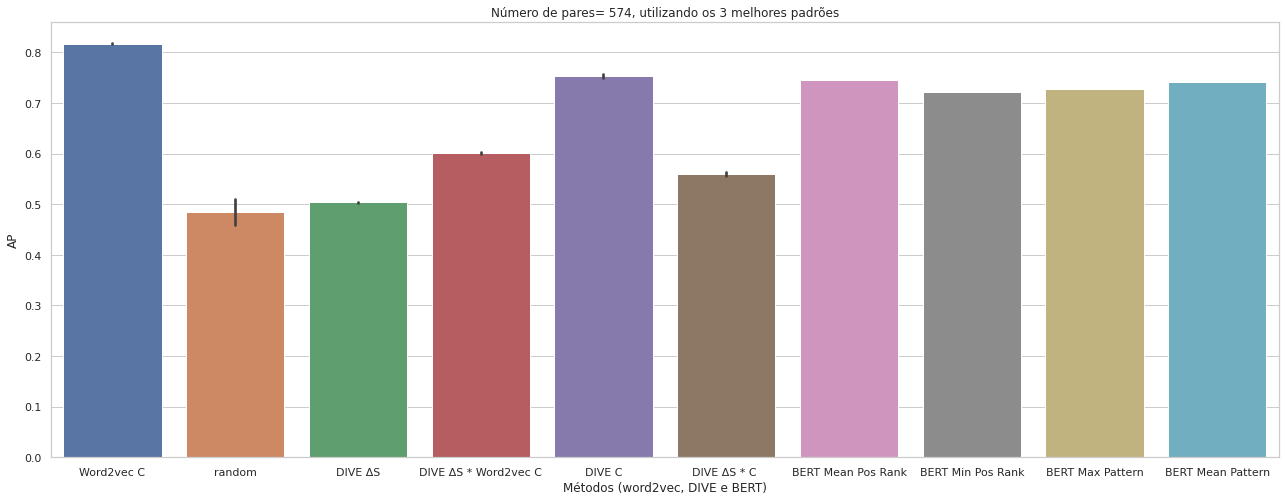

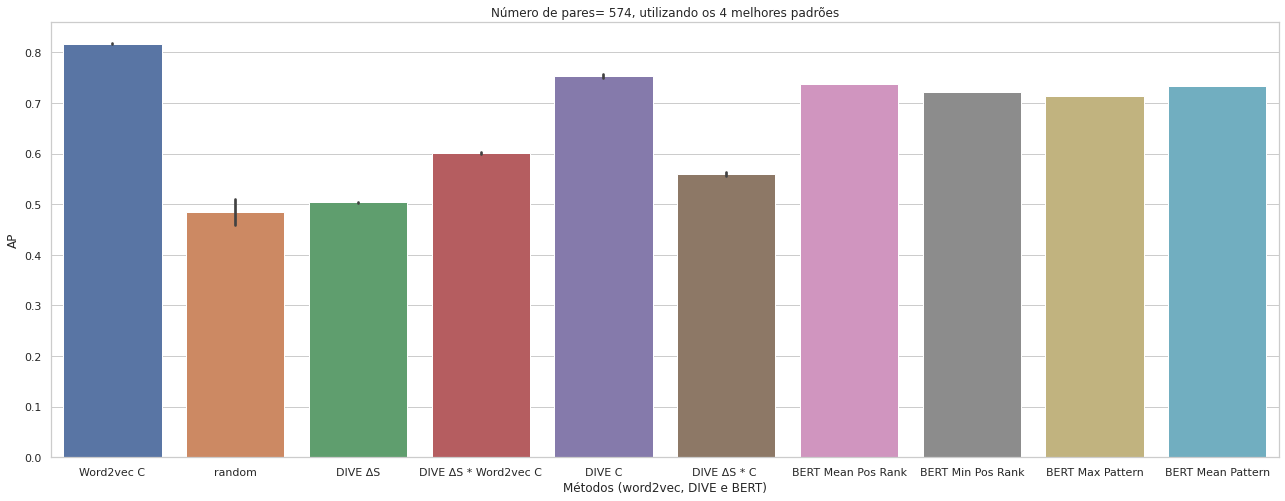

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid")
plt.clf()

method_names = {'word2vec': 'Word2vec C', 'summation_dot_product': 'DIVE \u0394S * C ', 'dot_product': 'DIVE C',
                'rnd': 'random', 'summation': 'DIVE \u0394S', 'summation_word2vec': 'DIVE \u0394S * Word2vec C',
                'all_subword mean_positional_rank': 'BERT Mean Pos Rank', 'all_subword min_positional_rank': 'BERT Min Pos Rank',
                'all_subword max_pattern': 'BERT Max Pattern', 'all_subword mean_pattern': 'BERT Mean Pattern'}

path_d_w = ["../results/dive_token_1/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_hyper_bert-datasets.tsv",
            "../results/dive_token_1/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_not_oov/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_hyper_bert-datasets.tsv"
            ]
path_b = ["../results/neuralmind-bert-base-portuguese-cased_bert-score_sort-best-pattern/result.tsv"]
dfs = []
for p in path_d_w:
    df_temp = pd.read_csv(p, delimiter="\t")
    df_temp = df_temp[df_temp['epoch_num'] == 14]
    dfs.append(df_temp)

for p in path_b:
    df_temp = pd.read_csv(p, delimiter="\t")
    df_temp = df_temp[(df_temp['method'].str.contains("all_subword")) & (df_temp['corpus'].isin(["wikipedia240M", "bert"]))]
    dfs.append(df_temp)

df = pd.concat(dfs)
df['dataset'] = df['dataset'].map({'/home/gabrielescobar/Documentos/hyper_bert/datasets/conceptnet-hypernym-1_token_1.tsv': 'conceptnet-hypernym-1_token_1.tsv', 'conceptnet-hypernym-1_token_1.tsv': 'conceptnet-hypernym-1_token_1.tsv' })
df['method_format'] = df['method'].map(method_names)
unique_N = df.N.unique().tolist()
n_better_pattern = df.qts_pattern.unique().tolist()
n_better_pattern = [x for x in n_better_pattern if str(x) != 'nan']

best_4 = n_better_pattern[:4]


for n_pair in unique_N:
    for qtd in best_4:
        df_plot = df[(df['N'] == n_pair) & (df['qts_pattern'].isin([qtd, float('nan')]))]
        plt.figure(figsize=(22,8))
        ax = sns.barplot(x="method_format",y='AP', ci="sd",data=df_plot)
        ax.set(xlabel="Métodos (word2vec, DIVE e BERT)")
        ax.set_title(f"Número de pares= {n_pair}, utilizando os {int(qtd)} melhores padrões")
        plt.show()

# BERT usando todos os 15 padrões com e sem OOV


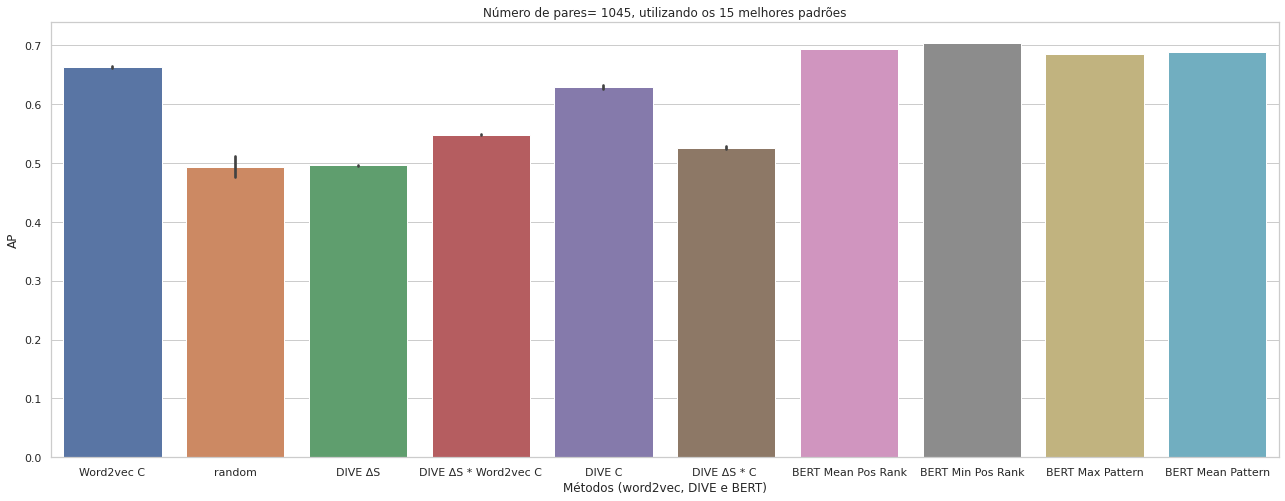

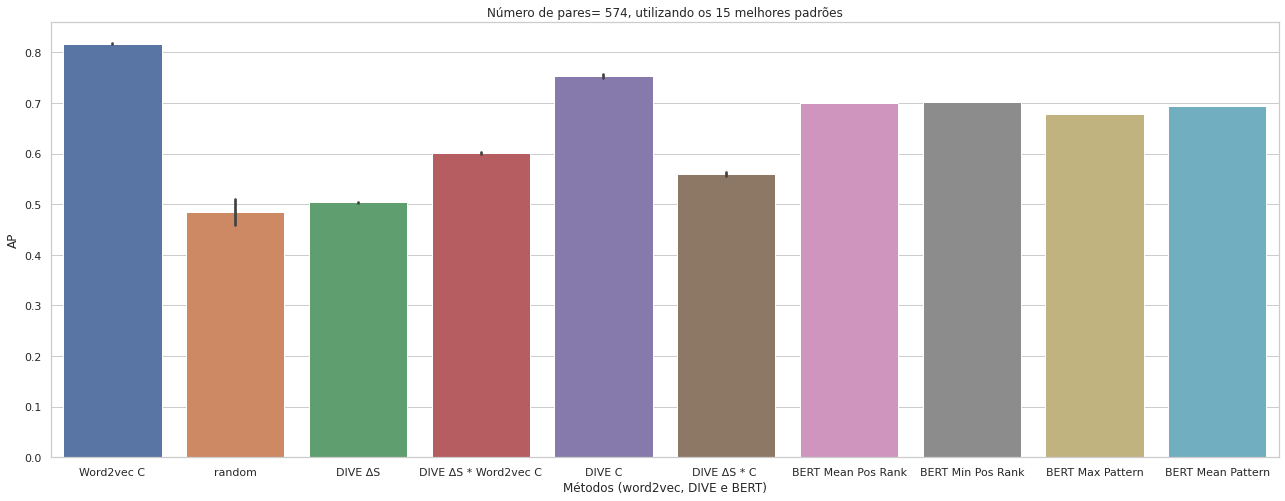

In [14]:
for n_pair in unique_N:
    df_plot = df[(df['N'] == n_pair) & (df['qts_pattern'].isin([n_better_pattern[-1], float('nan')]))]
    plt.figure(figsize=(22,8))
    ax = sns.barplot(x="method_format",y='AP', ci="sd",data=df_plot)
    ax.set(xlabel="Métodos (word2vec, DIVE e BERT)")
    ax.set_title(f"Número de pares= {n_pair}, utilizando os {int(n_better_pattern[-1])} melhores padrões")
    plt.show()

